In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display 
import IPython.display as ipd


In [2]:
debussy_file="/content/drive/My Drive/NCI/Research/code/notebook_python/audio_resources/debussy.wav"
redhot_file="/content/drive/My Drive/NCI/Research/code/notebook_python/audio_resources/redhot.wav"
duke_file="/content/drive/My Drive/NCI/Research/code/notebook_python/audio_resources/duke.wav"

In [3]:
ipd.Audio(debussy_file)

In [4]:
ipd.Audio(redhot_file)

In [5]:
ipd.Audio(duke_file)

In [6]:
#Load audio file with librosa
debussy,sr=librosa.load(debussy_file) # sr-sample
redhot,_=librosa.load(redhot_file)
duke,_=librosa.load(duke_file)

## Root Mean Squared error with Librosa

In [7]:
FRAME_SIZE=1024
HOPE_LENGTH=512


In [8]:
rms_debussy=librosa.feature.rms(debussy,frame_length=FRAME_SIZE,hop_length=HOPE_LENGTH)[0]
rms_redhot=librosa.feature.rms(redhot,frame_length=FRAME_SIZE,hop_length=HOPE_LENGTH)[0]
rms_duke=librosa.feature.rms(duke,frame_length=FRAME_SIZE,hop_length=HOPE_LENGTH)[0]


In [9]:
rms_duke

array([0.0543208 , 0.0602421 , 0.0598342 , ..., 0.09259744, 0.09614703,
       0.09483015], dtype=float32)

## Visualise RMSE+waveform

In [10]:
frames=range(len(rms_debussy))
t=librosa.frames_to_time(frames,hop_length=HOPE_LENGTH)

Text(0.5, 1.0, 'Duke')

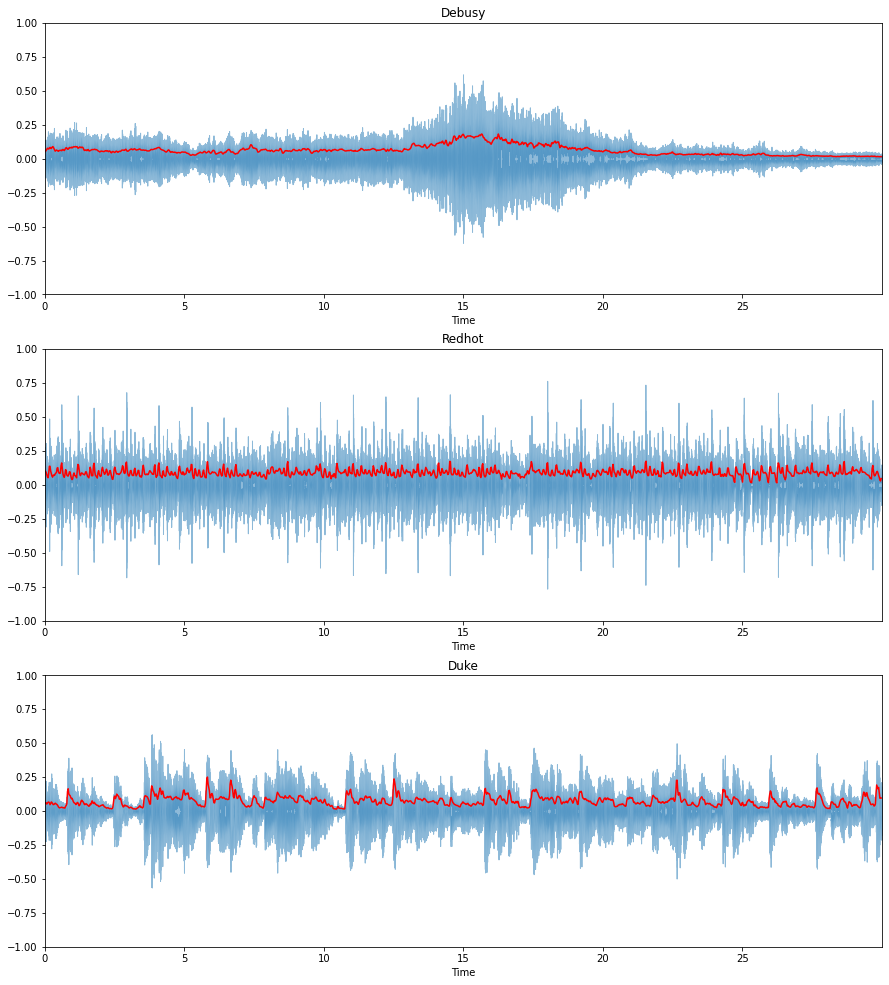

In [11]:
#rms energy is graphed in red
plt.figure(figsize=(15,17))
ax=plt.subplot(3,1,1)

librosa.display.waveplot(debussy,alpha=0.5)
plt.plot(t,rms_debussy,color="r")
plt.ylim((-1,1))
plt.title("Debusy")


plt.subplot(3,1,2)
librosa.display.waveplot(redhot,alpha=0.5)
plt.plot(t,rms_redhot,color="r")
plt.ylim((-1,1))
plt.title("Redhot")

plt.subplot(3,1,3)
librosa.display.waveplot(duke,alpha=0.5)
plt.plot(t,rms_duke,color="r")
plt.ylim((-1,1))
plt.title("Duke")

## RMSE from scratch

In [12]:
def rmse(signal,frame_size,hop_length):
    rmse=[]

    #Calculate rmse for each frame
    for i in range(0,len(signal),hop_length):
        rmse_current_frame=np.sqrt(sum(signal[i:i+frame_size]**2)/frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [13]:
rms_debussy1=rmse(debussy,FRAME_SIZE,HOPE_LENGTH)
rms_redhot1=rmse(redhot,FRAME_SIZE,HOPE_LENGTH)
rms_duke1=rmse(duke,FRAME_SIZE,HOPE_LENGTH)

Text(0.5, 1.0, 'Duke')

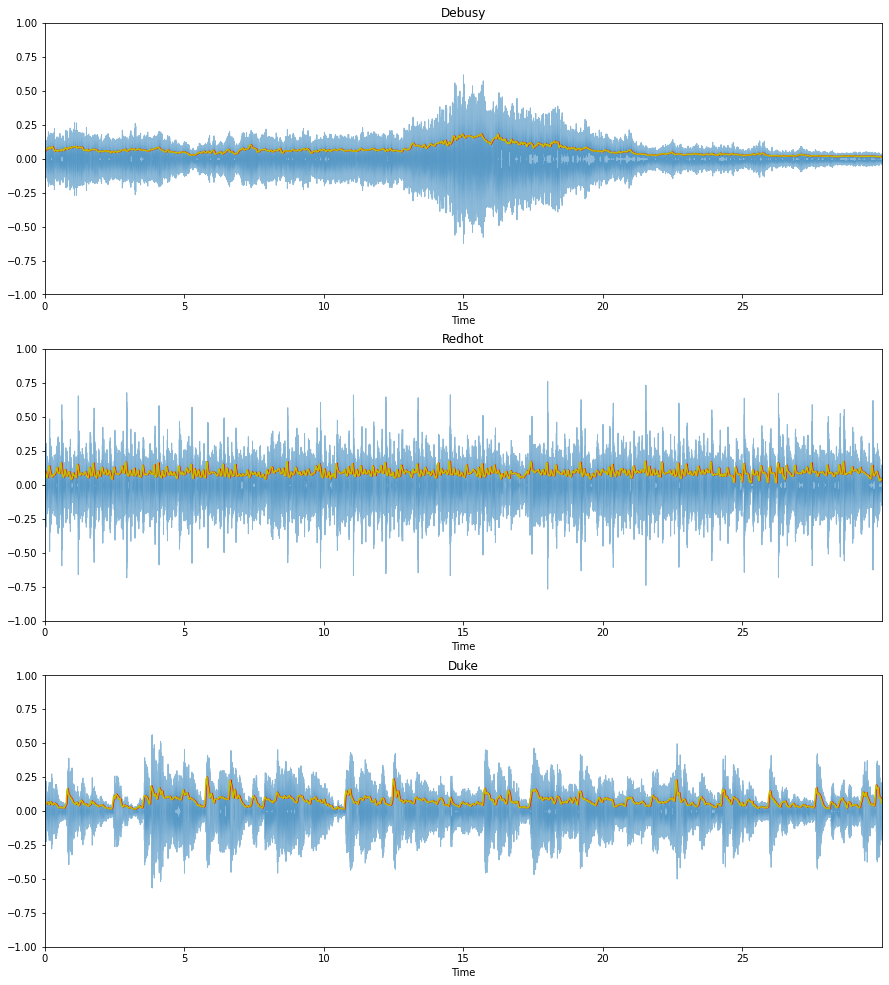

In [14]:
#rms energy is graphed in red
plt.figure(figsize=(15,17))
ax=plt.subplot(3,1,1)

librosa.display.waveplot(debussy,alpha=0.5)
plt.plot(t,rms_debussy,color="r")
plt.plot(t,rms_debussy1,color="y")
plt.ylim((-1,1))
plt.title("Debusy")


plt.subplot(3,1,2)
librosa.display.waveplot(redhot,alpha=0.5)
plt.plot(t,rms_redhot,color="r")
plt.plot(t,rms_redhot1,color="y")

plt.ylim((-1,1))
plt.title("Redhot")

plt.subplot(3,1,3)
librosa.display.waveplot(duke,alpha=0.5)
plt.plot(t,rms_duke,color="r")
plt.plot(t,rms_duke1,color="y")
plt.ylim((-1,1))
plt.title("Duke")

## Zero crossing with librosa

In [15]:
zcr_debussy=librosa.feature.zero_crossing_rate(debussy,frame_length=FRAME_SIZE,hop_length=HOPE_LENGTH)[0]
zcr_redhot=librosa.feature.zero_crossing_rate(redhot,frame_length=FRAME_SIZE,hop_length=HOPE_LENGTH)[0]
zcr_duke=librosa.feature.zero_crossing_rate(duke,frame_length=FRAME_SIZE,hop_length=HOPE_LENGTH)[0]

## Visualizing zero-crossing rate with Librosa

In [16]:
frames=range(len(zcr_debussy))
t=librosa.frames_to_time(frames,hop_length=HOPE_LENGTH)

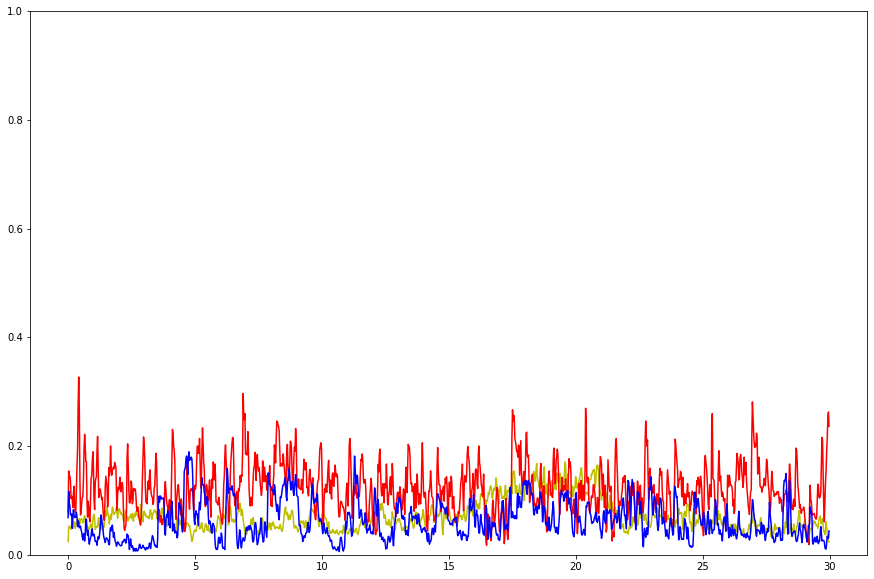

In [17]:
plt.figure(figsize=(15,10))

plt.plot(t,zcr_debussy,color="y")
plt.plot(t,zcr_redhot,color="r")
plt.plot(t,zcr_duke,color="b")
plt.ylim(0,1)
plt.show()

## ZCR with voice vs NO voice

In [18]:
noisy_file="/content/drive/My Drive/NCI/Research/code/notebook_python/audio_resources/noise.wav"
voice_file="/content/drive/My Drive/NCI/Research/code/notebook_python/audio_resources/voice.wav"


In [19]:
ipd.Audio(noisy_file)

Output hidden; open in https://colab.research.google.com to view.

In [20]:
ipd.Audio(voice_file)

In [24]:
#load audio files
voice,_=librosa.load(voice_file,duration=15)
noise,_=librosa.load(noisy_file,duration=15)


In [25]:
# get zcr
zcr_voice=librosa.feature.zero_crossing_rate(voice,frame_length=FRAME_SIZE,hop_length=HOPE_LENGTH)[0]
zcr_noise=librosa.feature.zero_crossing_rate(noise,frame_length=FRAME_SIZE,hop_length=HOPE_LENGTH)[0]


In [26]:
frames=range(len(zcr_voice))
t=librosa.frames_to_time(frames,hop_length=HOPE_LENGTH)

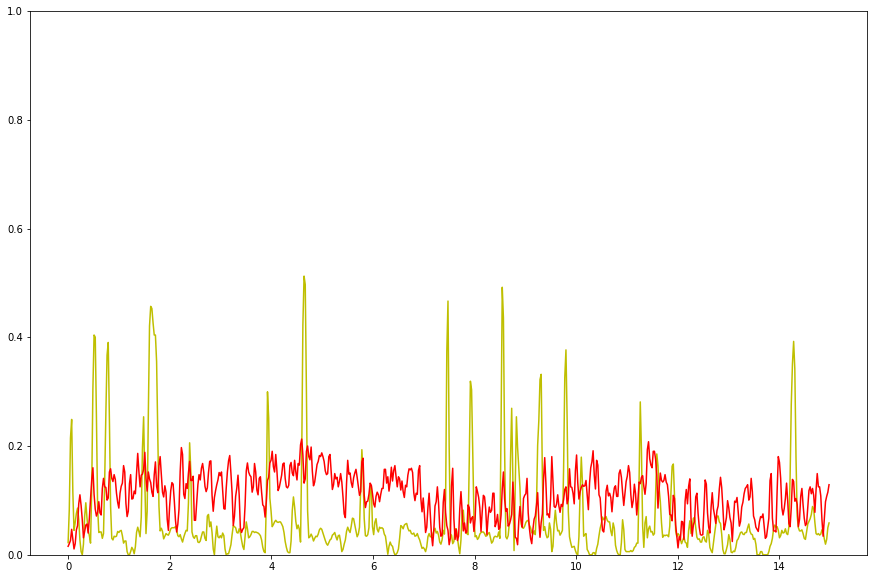

In [27]:
plt.figure(figsize=(15,10))

plt.plot(t,zcr_voice,color="y")
plt.plot(t,zcr_noise,color="r")
plt.ylim(0,1)
plt.show()